## 따릉이 대여량 예측 경진대회(DACON)

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# train.csv : 학습 데이터
# test.csv : 테스트 데이터
# sample_submission.csv : 제출 양식

# 학습데이터(train.csv) 불러오기
bicycle = pd.read_csv('train.csv')
bicycle

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


In [4]:
# 결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(bicycle)

결측치가 존재하지 않습니다


In [5]:
# 문자열(string) -> 숫자형 변환
# 모델 학습을 위해서 문자열(string)을 숫자형으로 바꿀 필요있음
# bicycle 데이터의 date_time 컬럼이 문자열로 이루어져 있어 숫자형으로 바꿔줌

def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(bicycle)
    
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


### 변수 및 모델 정의

In [6]:
# 주어진 날씨 데이터를 가지고 따릉이를 얼마나 빌리는지 예측
# 날씨 데이터 : X, 따릉이 대여 수 : y

X = bicycle.drop(['date_time', 'number_of_rentals'], axis=1)
y = bicycle.number_of_rentals

In [7]:
# sklearn에서 제공하는 선형회귀 모델 사용

from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(X, y) # 학습

LinearRegression()

In [8]:
y_hat = model.predict(X) # y 예측

In [9]:
nmae = np.mean(abs(y_hat - y) / y) # nmae 계산

print(f'모델 NMAE: {nmae}') # 예측치와 실제값이 32% 정도 오차율을 보임

모델 NMAE: 0.32347975212014857


### 예측값 확인

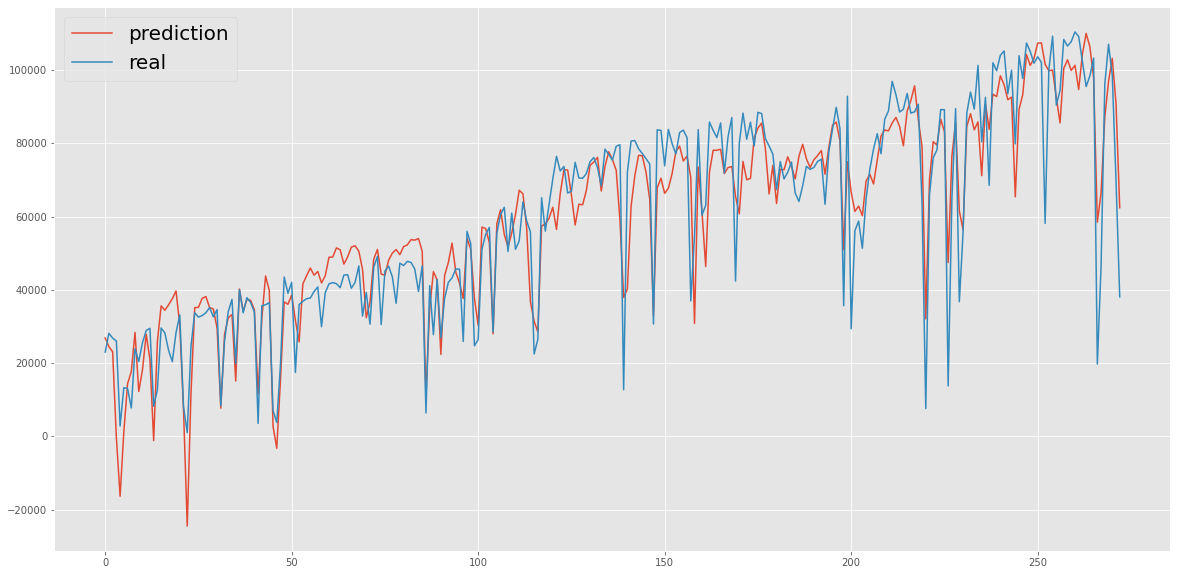

In [10]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.show() # 오차는 있지만 추세를 어느정도 따라가고 있다

### test 데이터로 생성된 모델에 적용

In [12]:
# 주어진 test데이터로 예측을 진행한 다음 sample_submission.csv에 날짜별로 예측한 값 넣기

test = pd.read_csv('test.csv') # 데이터를 불러온 뒤
submission  = pd.read_csv('sample_submission.csv')

check_missing_col(test) # 결측치 확인

year, month, day = seperate_datetime(test) #날짜 숫자로 분리 후 

#새로운 컬럼을 생성
test['year'] = year 
test['month'] = month
test['day'] = day

test.head()

결측치가 존재하지 않습니다


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


In [14]:
# 문자열인 date_time 컬럼 drop
test_X = test.drop('date_time', axis = 1)

# train data로 학습시킨 모델에 test_X데이터를 넣고 예측
test_yhat = model.predict(test_X)

# submission dataFrame 완성
submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
submission.to_csv('sample_submission.csv', index= False)